<a href="https://colab.research.google.com/github/snmahsa/regression/blob/main/poly_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#download data
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2023-04-16 08:15:19--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   115KB/s    in 0.6s    

2023-04-16 08:15:21 (115 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
#creat df and look at the data

df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [9]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [43]:
#creat mask
myrand=np.random.rand(len(df))
mask=myrand < 0.8
train=cdf[mask]
test=cdf[~mask]  

In [45]:
#Specify training data and testing data

trainx=np.asanyarray(train[['ENGINESIZE']])
trainy=np.asanyarray(train[['CO2EMISSIONS']])

testx=np.asanyarray(test[['ENGINESIZE']])
testy=np.asanyarray(test[['CO2EMISSIONS']])


In [46]:
from sklearn.preprocessing import PolynomialFeatures
#transform main data
poly=PolynomialFeatures(degree=2)
trainxpoly=poly.fit_transform(trainx)
trainxpoly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [54]:
#creat model
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(trainxpoly,trainy)

print('coefficient:',regr.coef_)
print('intercept:',regr.intercept_)



coefficient: [[ 0.         51.22672209 -1.62435715]]
intercept: [105.72621126]


In [70]:
# predict with test
testxpoly = poly.fit_transform(testx)
testpredict=regr.predict(testxpoly)


In [80]:
# score
# print(" model score is :", regr.score(testxpoly,testy))
from sklearn.metrics import r2_score
print("R2 score is : %.2f" % r2_score(testy,testpredict ) )

R2 score is : 0.74


Text(0, 0.5, 'Emission')

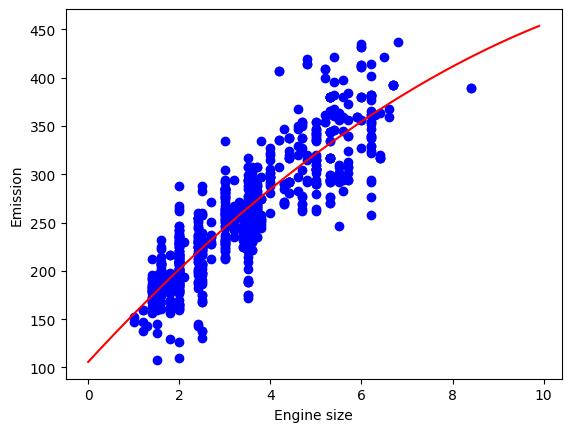

In [81]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
X = np.arange(0.0, 10.0, 0.1)
y = regr.intercept_[0]+ regr.coef_[0][1]*X+ regr.coef_[0][2]*np.power(X, 2)
plt.plot(X, y, '-r' )
#false
# plt.plot(trainx,regr.intercept_[0]+ regr.coef_[0][1]*trainx+ regr.coef_[0][2]*np.power(trainx, 2))
plt.xlabel("Engine size")
plt.ylabel("Emission")